In [1]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.mx import DeepStateEstimator
from gluonts.mx import DeepAREstimator
from gluonts.mx.trainer import Trainer
import mxnet as mx

/home/zheng-s/anaconda3/envs/pytorch/lib/python3.9/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
# load data
history = pd.read_csv('../data/results/history.csv', index_col=0)
ssp245 = pd.read_csv('../data/results/ssp245.csv', index_col=0)
ssp585 = pd.read_csv('../data/results/ssp585.csv', index_col=0)
history_wl = pd.read_csv('../data/results/history_wl.csv', index_col=0)

In [9]:
# 将数据转换为GluonTS的格式
start = pd.Timestamp("1989-01-01")  # 这里的时间戳应该是你的数据的开始时间
target = history_wl.values.squeeze()
train_data = ListDataset([{'start': start, 'target': target}], freq='1D')

# 创建和训练模型
estimator = DeepAREstimator(freq='1D', prediction_length=365*10, context_length=len(target), trainer=Trainer(epochs=10, ctx=mx.context.cpu()))

predictor = estimator.train(training_data=train_data)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# 预测
test_data = ListDataset([{'start': start, 'target': target}], freq='1D')  # 测试数据也是训练数据，预测历史数据的未来

forecasts = list(predictor.predict(test_data))

# 画图
for forecast in forecasts:
    forecast.plot()

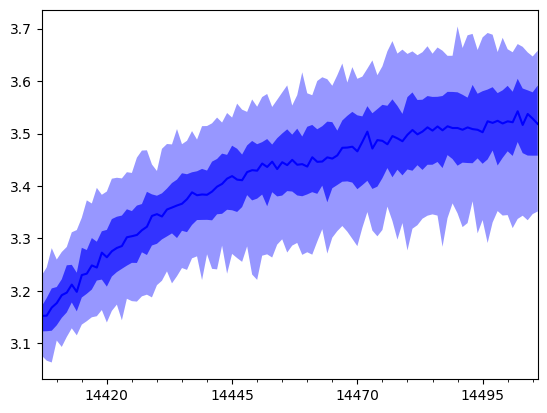

In [6]:
forecasts = list(predictor.predict(test_data))
# 画图
for forecast in forecasts:
    forecast.plot()

In [ ]:
# 将数据转换为GluonTS的格式
start = pd.Timestamp("01-01-1989", freq='1Y')  # 这里的时间戳应该是你的数据的开始时间
target = history_wl.values.squeeze()
dynamic_feat = history.values.T
train_data = ListDataset([{'start': start, 'target': target, 'feat_dynamic_real': dynamic_feat}], freq='1Y')

# 创建和训练模型
estimator = DeepAREstimator(freq='1Y', prediction_length=100, trainer=Trainer(epochs=10, ctx=mx.context.gpu()))
predictor = estimator.train(training_data=train_data)

# 预测
test_data = ListDataset([{'start': start, 'target': target}], freq='1Y')  # 测试数据也是训练数据，预测历史数据的未来
for test_entry, forecast in predictor.predict(test_data):
    print(forecast)
train_data = ListDataset([{'start': start, 'target': target}], freq='1Y')

# 创建和训练模型
estimator = DeepAREstimator(freq='1Y', prediction_length=100, trainer=Trainer(epochs=10, ctx=mx.context.gpu()))
predictor = estimator.train(training_data=train_data)

# 预测
test_data = ListDataset([{'start': start, 'target': target}], freq='1Y')  # 测试数据也是训练数据，预测历史数据的未来
for test_entry, forecast in predictor.predict(test_data):
    print(forecast)

In [9]:
import numpy as np

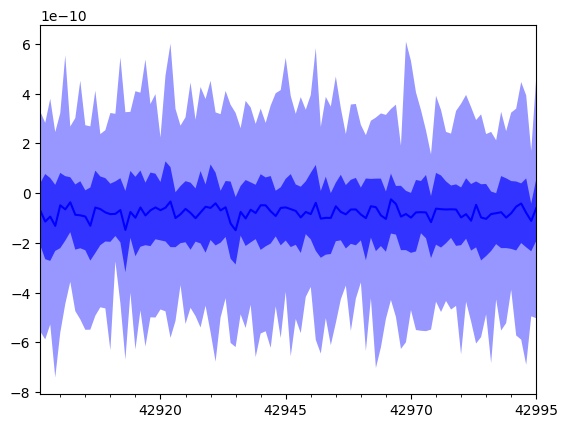

In [10]:
# 将数据转换为GluonTS的格式
start = pd.Timestamp("01-01-1989")  # 这里的时间戳应该是你的数据的开始时间

# 注意，这里假设 history_wl, history, 和 ssp245 都是在同一时间轴上的，长度相同
target = np.concatenate([history_wl.values.squeeze(), np.full(len(ssp245), np.nan)])  # 这里用 np.nan 填充未来的目标值
dynamic_feat = np.concatenate([history.values.squeeze(), ssp245.values.squeeze()])  # 这里将 history 和 ssp245 拼接起来

predict_data = ListDataset([{'start': start, 'target': target, 'feat_dynamic_real': dynamic_feat}], freq='1Y')

# 预测
forecasts = list(predictor.predict(predict_data))
# 画图
for forecast in forecasts:
    forecast.plot()

In [11]:
import matplotlib.pyplot as plt

# 预测的总长度（历史数据长度 + 预测长度）
total_length = len(history_wl) + len(ssp245)

# 创建时间轴
time_index = pd.date_range(start=start, periods=total_length, freq='1Y')

# 提取预测的均值
prediction_mean = forecasts[0].mean

# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(time_index, np.concatenate([history_wl.values.squeeze(), prediction_mean]))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Forecast')
plt.show()

ValueError: year 42895 is out of range

In [3]:
history_wl = history_wl.loc['1989-01-01':'1992-12-31']
history = history.loc['1989-01-01':'1992-12-31']
start = pd.Timestamp("1989-01-01")  # Use a valid date format
target = history_wl.values.squeeze()
dynamic_feat = history.values.T

train_data = ListDataset([{
    'start': start,
    'target': target,
    'feat_dynamic_real': dynamic_feat,
    'feat_static_cat': [0, 1]
}], freq='1D')

estimator = DeepStateEstimator(
    prediction_length=100,
    use_feat_dynamic_real=True,
    use_feat_static_cat=True,
    cardinality=[2],
    freq='1D'
)
predictor = estimator.train(train_data, num_workers=1)

test_data = ListDataset([{
    'start': start,
    'target': target,
    'feat_dynamic_real': dynamic_feat,
    'feat_static_cat': [0, 1]
}], freq='1D')

predictions = next(predictor.predict(test_data))

print(predictions)


  0%|          | 0/50 [00:00<?, ?it/s]

: 

: 